In [18]:
# Libraries used/ Run before everything else!
library(tidyverse)
library(repr)
library(tidymodels)

Our group chose Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In this project I will be exploring how to approach and prepare for analysis of predicting if someone is a subscriber based on their player data found in players.csv (on canvas as well).

Specifically if/how a player's experience is indicitive of their subscription tenedencies.


In [19]:
#First we should read our data to understand what we are working with
players <- read_csv("/home/jovyan/work/Individual Project/DSCI-project/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
players <- mutate(players, experience = as.factor(experience)) #changing experiece from character string to factor
players


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


ERROR: Error in eval(expr, envir, enclos): object 'Age' not found


We can see our data is tidy, every row an observation, every coloumn a variable, and every cell is filled (except for some NA's). There are 196 players in total.

We have seven variables: "experience"	"subscribe"	"hashedEmail"	"played_hours"	"name"	"gender"	"Age"

Experience is a class with a range of "Beginner, Amateur, Regular, Veteren, Pro" 

Subscribe is a boolean (True or False) that shows if they have subscribed to a game-related newsletter or not, this is our main predicitive focus.

HashedEmail is a character string that shows an encoded identifier, no useful for us but essential if contact with the person is needed.

Played hours is a dbl, a decimal number with one decimal of precision, and is how many hours were played on the study's server.

Name is a character string and is the name of the person.

Gender is also a character string and is the gender of the person.

Age is a dbl but has no decimal places in the data and is treated as an integer, it is the age of the person.

In [21]:


Age_Mean <- mean(players$Age, na.rm = TRUE)
Age_Mean
hours_played_mean <- mean(players$played_hours, na.rm = TRUE)
hours_played_mean

[1] 21.13918

[1] 5.845918

The mean Age is 21.14, and the mean hours played is 5.85

To explore which variables we should use in our full report some graphs will be made to compare subscribe with other variables (namely experience and hours played)

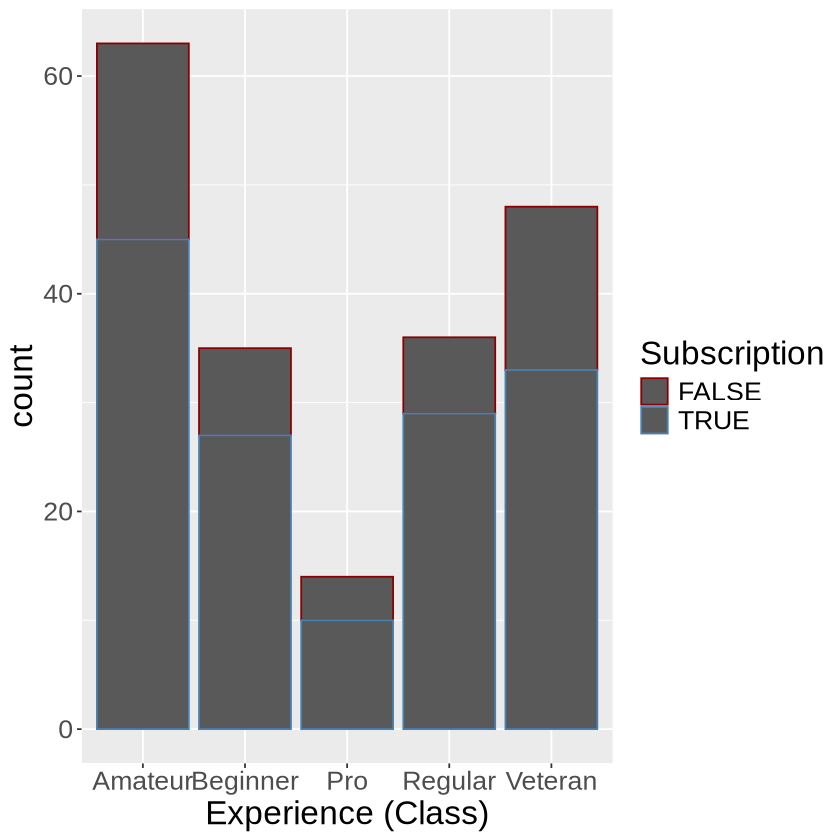

In [28]:

#Plotting experience versus subscriptions
ex_plot <- players|>
  ggplot(aes(x = experience, color = subscribe)) +
  geom_bar() +
  labs(x = "Experience (Class)",
       color = "Subscription") +
  scale_color_manual(values = c("darkRed", "steelblue")) +
  theme(text = element_text(size = 20))

ex_plot

As we can see, though unordered, there is a clear pattern of subscription rates being higher the more experienced you are